In [17]:
import scanpy as sc
import scipy.io as sio
import pandas as pd
from anndata import AnnData
import umap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler

def normalize_one(x1, type='all'):
    if type=='per_cell':
        x1 = normalize(x1, axis=1)
    elif type=='per_gene':
        x1 = normalize(x1, axis=0)
    elif type=='all':
        train_scaler = MinMaxScaler(feature_range=(0, 1))
        x1 = train_scaler.fit_transform(x1)
    elif type=='all_norm':
        train_scaler = StandardScaler()
        x1 = train_scaler.fit_transform(x1)

    elif type=='all_genes':
        x1_ann = AnnData(x1)
        sc.pp.normalize_total(x1_ann, target_sum=5, inplace=False)
        sc.pp.log1p(x1_ann)
        sc.pp.scale(x1_ann, zero_center=False, max_value=5)
        x1 = x1_ann.X
    return x1
plt.rcParams['font.sans-serif'] = ['Times New Roman']
del matplotlib.font_manager.weight_dict['roman']
alpha_value = 0.6

KeyError: 'roman'

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


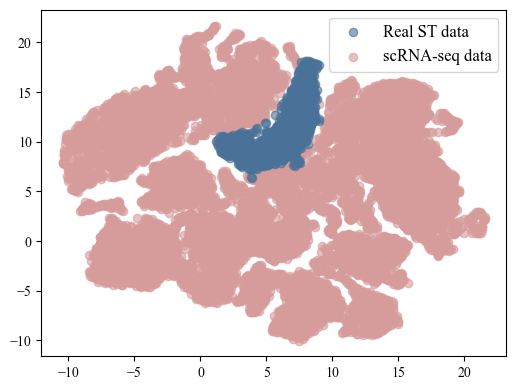

<Figure size 640x480 with 0 Axes>

In [18]:
###### STARmap
mat_name = './data/STARmap.mat'
data = sio.loadmat(mat_name)
genes = [i for item in data['genes'].flatten() for i in item]
x1_cell = data['ST']
x2_rna = data['rna']
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
names = {0: 'Real ST data', 1: 'scRNA-seq data'}
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.8, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#D69C9B'}
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[color_idx], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_gt.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


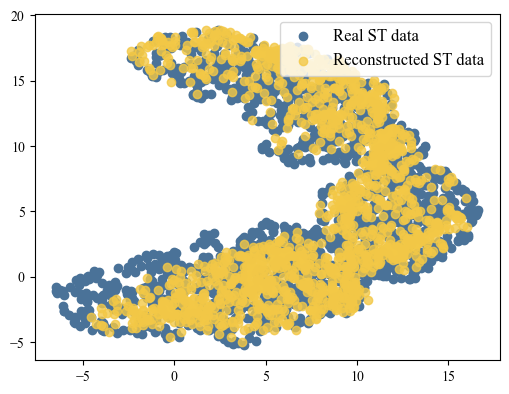

<Figure size 640x480 with 0 Axes>

In [19]:
x1_cell = np.load('./data_vis/starmap_predict_st_result.npy')
x2_rna = data['ST']
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
color_map = {0: '#4A7298', 1: '#F3C846'}
names = {0: 'Real ST data', 1: 'Reconstructed ST data'}
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.8, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
scrna_alpha = 1.0
starmap_alpha = 0.8
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 0
        plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                    color=color_map[label], alpha=scrna_alpha, zorder=zorder_idx)
    else:
        zorder_idx = 1
        plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=starmap_alpha, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_ours.png')


C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

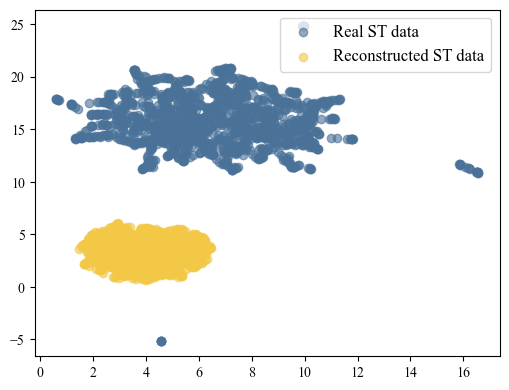

<Figure size 640x480 with 0 Axes>

In [20]:
x1_cell = pd.read_csv(r'./data_vis/STEM_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_STEM_after.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

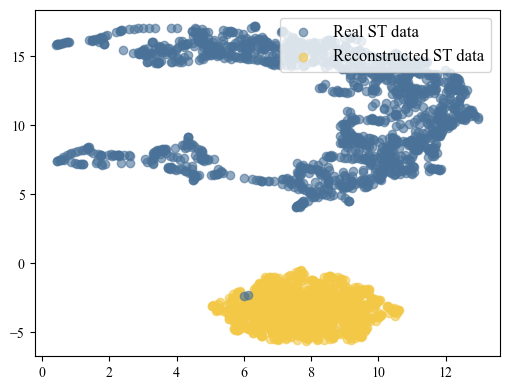

<Figure size 640x480 with 0 Axes>

In [21]:
x1_cell = pd.read_csv(r'./data_vis/gimVI_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_gimVI_after.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

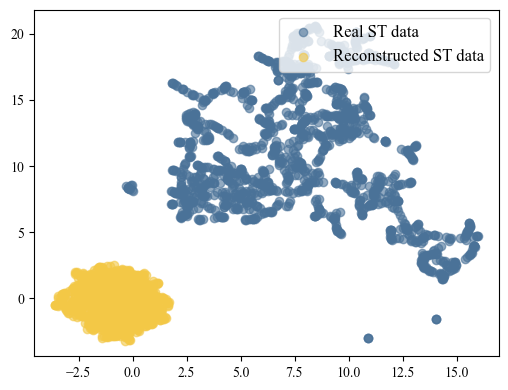

<Figure size 640x480 with 0 Axes>

In [22]:
x1_cell = pd.read_csv('./data_vis/GraphST_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_GraphST_after.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

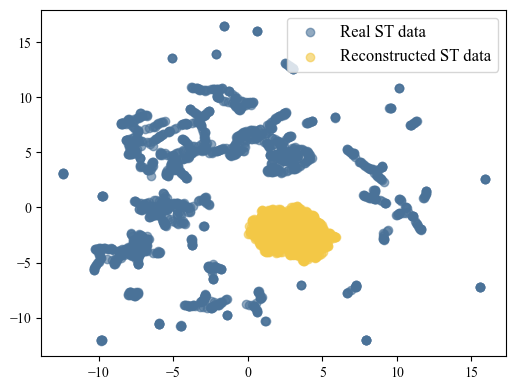

<Figure size 640x480 with 0 Axes>

In [23]:
x1_cell = pd.read_csv('./data_vis/novoSpaRc_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_novosparc_after.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

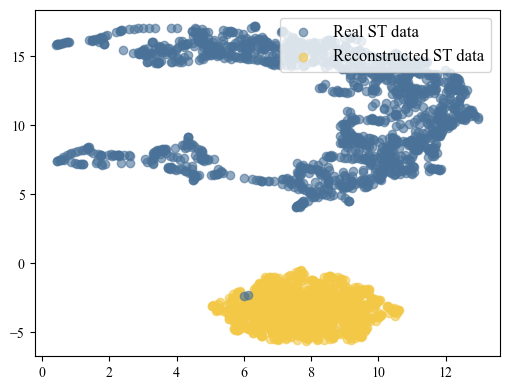

<Figure size 640x480 with 0 Axes>

In [24]:
x1_cell = pd.read_csv('./data_vis/gimVI_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_stdiff_after.png')

C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

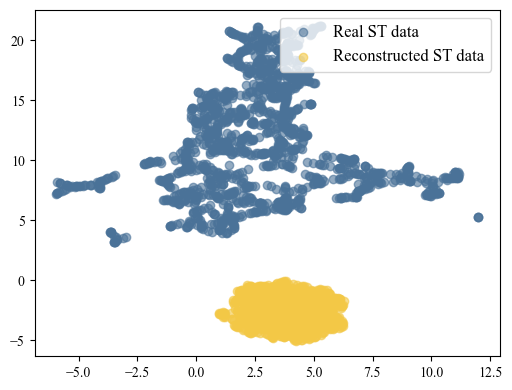

<Figure size 640x480 with 0 Axes>

In [25]:
x1_cell = pd.read_csv('./data_vis/SpaOTsc_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
combined_data = np.concatenate((x1_cell, x2_rna), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_SpaOTsc_after.png')


(1549, 995) (1549, 996)


C:\ProgramData\Anaconda3\envs\torch1.10\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 600x450 with 0 Axes>

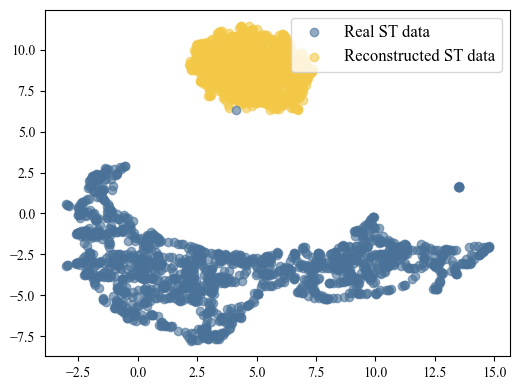

<Figure size 640x480 with 0 Axes>

In [26]:
x1_cell = pd.read_csv(r'./data_vis/Tangram_impute_STARmap.csv', index_col=0)
x2_rna = data['ST']
plt.figure(figsize=(6, 4.5))
color_map = {0: '#4A7298', 1: '#F3C846'}
x2_rna = normalize_one(x2_rna)
print (x1_cell.shape, x2_rna.shape)
combined_data = np.concatenate((x1_cell, x2_rna[:, :-1]), axis=0)
labels = np.concatenate((np.zeros(x1_cell.shape[0]), np.ones(x2_rna.shape[0])))
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.2, n_components=2, random_state=2023)
umap_result = umap_model.fit_transform(combined_data)
plt.figure(figsize=(6, 4.5))
for label in np.unique(labels):
    color_idx = int(label)
    if color_idx == 0:
        zorder_idx = 1
    else:
        zorder_idx = 0
    plt.scatter(umap_result[labels == label, 1], umap_result[labels == label, 0], label=names[label], \
                color=color_map[label], alpha=alpha_value, zorder=zorder_idx)
plt.legend(fontsize=12, loc='upper right')
plt.show()
plt.savefig('./savefigs/starmap_Tangram_after.png')

